In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
kathimerini_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kathimerini_full_articles_tempi_2023_1-7_3_2023.csv')

In [4]:
kathimerini_df.head(5)

site                                                url  \
0  kathimerini.gr  https://www.kathimerini.gr/society/562312186/t...   
1  kathimerini.gr  https://www.kathimerini.gr/society/562311997/t...   
2  kathimerini.gr  https://www.kathimerini.gr/society/562311928/v...   
3  kathimerini.gr  https://www.kathimerini.gr/society/562311403/t...   
4  kathimerini.gr  https://www.kathimerini.gr/society/562311394/t...   

    section                                              title  \
0  Κοινωνία  Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...   
1  Κοινωνία  Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...   
2  Κοινωνία  Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...   
3  Κοινωνία  Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...   
4  Κοινωνία  Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...   

                        date                  author  \
0  2023-03-08T11:01:55+02:00              \nNewsroom   
1  2023-03-08T07:34:36+02:00              \nNewsroom   
2  2023-03-08T00:03:52+02:00              \nNewsroom   
3  2023-03-08T07:17:28+02:00     \nΓιάννης Σουλιώτης   
4  2023-03-08T07:11:51+02:00  \nΓιάννης Παπαδόπουλος   

                                           full_text  
0  Ευθεία αντίρρηση για την αντικατάσταση των δικ...  
1  Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...  
2  Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...  
3  Επειτα από καταγγελίες η Οικονομική Εισαγγελία...  
4  Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...

In [5]:
kathimerini_df.shape

(206, 7)

In [6]:
kathimerini_df.dropna()

site                                                url  \
0    kathimerini.gr  https://www.kathimerini.gr/society/562312186/t...   
1    kathimerini.gr  https://www.kathimerini.gr/society/562311997/t...   
2    kathimerini.gr  https://www.kathimerini.gr/society/562311928/v...   
3    kathimerini.gr  https://www.kathimerini.gr/society/562311403/t...   
4    kathimerini.gr  https://www.kathimerini.gr/society/562311394/t...   
..              ...                                                ...   
201  kathimerini.gr  https://www.kathimerini.gr/society/562300477/s...   
202  kathimerini.gr  https://www.kathimerini.gr/politics/foreign-po...   
203  kathimerini.gr  https://www.kathimerini.gr/society/562300459/s...   
204  kathimerini.gr  https://www.kathimerini.gr/society/562300423/s...   
205  kathimerini.gr  https://www.kathimerini.gr/society/562300363/s...   

                section                                              title  \
0              Κοινωνία  Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...   
1              Κοινωνία  Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...   
2              Κοινωνία  Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...   
3              Κοινωνία  Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...   
4              Κοινωνία  Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...   
..                  ...                                                ...   
201            Κοινωνία  Σύγκρουση τρένων στα Τέμπη: «Γίνονται όλα χειρ...   
202  Εξωτερική Πολιτική  Σύγκρουση τρένων στα Τέμπη: Συλλυπητήρια Τσαβο...   
203            Κοινωνία  Σύγκρουση τρένων στα Τέμπη: Κηρύσσεται τριήμερ...   
204            Κοινωνία  Σύγκρουση τρένων στα Τέμπη: Εισαγγελέας Εφετών...   
205            Κοινωνία  Σύγκρουση τρένων στα Τέμπη – Γ. Αρτοποιός στην...   

                          date                   author  \
0    2023-03-08T11:01:55+02:00               \nNewsroom   
1    2023-03-08T07:34:36+02:00               \nNewsroom   
2    2023-03-08T00:03:52+02:00               \nNewsroom   
3    2023-03-08T07:17:28+02:00      \nΓιάννης Σουλιώτης   
4    2023-03-08T07:11:51+02:00   \nΓιάννης Παπαδόπουλος   
..                         ...                      ...   
201  2023-03-01T10:54:30+02:00               \nNewsroom   
202  2023-03-01T10:41:17+02:00               \nNewsroom   
203  2023-03-01T10:15:26+02:00               \nNewsroom   
204  2023-03-01T09:53:23+02:00         \nΙωάννα Μάνδρου   
205  2023-03-01T08:36:08+02:00  \nΔήμητρα Τριανταφύλλου   

                                             full_text  
0    Ευθεία αντίρρηση για την αντικατάσταση των δικ...  
1    Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...  
2    Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...  
3    Επειτα από καταγγελίες η Οικονομική Εισαγγελία...  
4    Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...  
..                                                 ...  
201  Σε σοβαρές καταγγελίες για το σιδηροδρομικό δυ...  
202  Τα συλλυπητήριά του στον Νίκο Δένδια για το τρ...  
203  Με απόφαση του πρωθυπουργού κηρύσσεται τριήμερ...  
204  Με εντολή του Εισαγγελέα του Αρείου Πάγου Ισίδ...  
205  Για ανθρώπους που εκσφενδονίστηκαν από τα βαγό...  

[205 rows x 7 columns]

In [7]:
kathimerini_df['full_text'].loc[55]

'Οι δικηγόροι μελετούν την παρέμβασή τους στην υπόθεση του σιδηροδρομικού δυστυχήματος των Τεμπών, μετά από απόφαση της Ολομέλειας των Προέδρων των Δικηγορικών Συλλόγων Ελλάδος, ενώ παράλληλα επισημαίνουν ότι η διενέργεια της ανάκρισης για την επίμαχη υπόθεση, λόγω της μείζονος σοβαρότητας, θα πρέπει να ανατεθεί σε ειδικό εφέτη ανακριτή. \xa0«Η Ολομέλεια των προέδρων των Δικηγορικών Συλλόγων Ελλάδος, που συνεδρίασε στις 5.3.2023, μέσω τηλεδιάσκεψης, με αφορμή το πρόσφατο πολύνεκρο σιδηροδρομικό δυστύχημα, εξέδωσε την ακόλουθη ανακοίνωση: 1. Η Ολομέλεια εκφράζει τα ειλικρινή της συλλυπητήρια στις οικογένειες των θυμάτων και εύχεται στους τραυματίες ταχεία αποκατάσταση της υγείας τους. Στεκόμαστε συγκλονισμένοι μπροστά σε αυτή την τραγωδία με δεκάδες θύματα νέους ανθρώπους. Δεν μπορεί να το χωρέσει ο νους μας. Η Πολιτεία υποχρεούται άμεσα, χωρίς περιστροφές, να εγγυηθεί και να αναλάβει την ευθύνη για την πλήρη και πολυεπίπεδη στήριξη των οικογενειών των θυμάτων και των τραυματιών. 2. Η τ

In [8]:
kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("\xa0", "")

In [9]:
for i in range(0, kathimerini_df.shape[0]):
  if 'Google News' in kathimerini_df['full_text'].loc[i]:
    kathimerini_df['full_text'].loc[i] = kathimerini_df['full_text'].loc[i][:len(kathimerini_df['full_text'].loc[i]) - 182]

In [10]:
kathimerini_df['full_text'].loc[32]

'Υπήρχε ή όχι όριο ηλικίας που αγνοήθηκε στην περίπτωση του 59χρονου Β.Σ., ο οποίος προσελήφθη τον Ιούνιο του 2022 για τη θέση του σταθμάρχη Λάρισας; Τα δεδομένα της έρευνας κατατείνουν στο συμπέρασμα ότι τα 48 έτη ήταν επιθυμητή, όχι όμως και απαραίτητη προϋπόθεση για την επιστροφή του στον ΟΣΕ. Και ο δεύτερος δημόσιος υπάλληλος εξάλλου που, όπως και ο Β.Σ., επέστρεψε στον οργανισμό μέσω του προγράμματος κινητικότητας (πρόκειται για διοικητικό υπάλληλο του Πανεπιστημίου Θεσσαλίας) έχει συμπληρώσει το 49ο έτος της ηλικίας του. Το θέμα ανέκυψε έπειτα από ανακοίνωση του ΣΥΡΙΖΑ και συγκεκριμένα του τομεάρχη Διαφάνειας Γιάννη Ραγκούση, ο οποίος κατήγγειλε ότι η πρόσληψη του 59χρονου είναι «εξόφθαλμα παράνομη». Και αυτό διότι σύμφωνα με τον κ. Ραγκούση, η συγκεκριμένη θέση είχε ηλικιακό όριο τα 48 έτη. «Σύμφωνα με τα αναλυτικά στοιχεία θέσεων του 1ου κύκλου κινητικότητας του 2022 και συγκεκριμένα για την κάλυψη της θέσης με κωδικό 1645713805, Δ.Ε. Σταθμαρχών, ο ΟΣΕ απαιτούσε ρητώς κι εγγράφ

**_____________________**

In [11]:
kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒", "")

In [12]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒Ειδήσεις σήμερα Ακολουθήστε τοkathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίεςΕιδήσεις από την Ελλάδα και τον Κόσμο, στο kathimerini.gr", "")

In [13]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("Ειδήσεις σήμερα Ακολουθήστε τοkathimerini.gr στο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίεςΕιδήσειςαπό την Ελλάδα και τον Κόσμο, στοkathimerini.gr", "")

In [14]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒ Ειδήσεις σήμερα Ακολουθήστε το kathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίες Ειδήσειςαπό την Ελλάδα και τον Κόσμο, στοkathimerini.gr", "")

In [15]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒Ειδήσεις σήμερα Ακολουθήστε τοkathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίεςΕιδήσειςαπό την Ελλάδα και τον Κόσμο, στοkathimerini.gr", "")

In [16]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒Ειδήσεις σήμερα Ακολουθήστε τοkathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίεςΕιδήσειςαπό την Ελλάδα και τον Κόσμο, στο kathimerini.gr", "")

In [17]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒Ειδήσεις σήμερα Ακολουθήστε τοkathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίεςΕιδήσειςαπό την Ελλάδα και τον Κόσμο, στοkathimerini.gr","")

In [18]:
#kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("kathimerini gr", "")

In [19]:
kathimerini_df.loc[0, 'date']

'2023-03-08T11:01:55+02:00'

In [20]:
kathimerini_df['date'] = pd.to_datetime(kathimerini_df['date'], format='%Y-%m-%dT%H:%M:%S%z')
kathimerini_df.head()

site                                                url  \
0  kathimerini.gr  https://www.kathimerini.gr/society/562312186/t...   
1  kathimerini.gr  https://www.kathimerini.gr/society/562311997/t...   
2  kathimerini.gr  https://www.kathimerini.gr/society/562311928/v...   
3  kathimerini.gr  https://www.kathimerini.gr/society/562311403/t...   
4  kathimerini.gr  https://www.kathimerini.gr/society/562311394/t...   

    section                                              title  \
0  Κοινωνία  Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...   
1  Κοινωνία  Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...   
2  Κοινωνία  Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...   
3  Κοινωνία  Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...   
4  Κοινωνία  Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...   

                       date                  author  \
0 2023-03-08 11:01:55+02:00              \nNewsroom   
1 2023-03-08 07:34:36+02:00              \nNewsroom   
2 2023-03-08 00:03:52+02:00              \nNewsroom   
3 2023-03-08 07:17:28+02:00     \nΓιάννης Σουλιώτης   
4 2023-03-08 07:11:51+02:00  \nΓιάννης Παπαδόπουλος   

                                           full_text  
0  Ευθεία αντίρρηση για την αντικατάσταση των δικ...  
1  Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...  
2  Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...  
3  Επειτα από καταγγελίες η Οικονομική Εισαγγελία...  
4  Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...

In [21]:
kathimerini_df.dtypes

site                                        object
url                                         object
section                                     object
title                                       object
date         datetime64[ns, pytz.FixedOffset(120)]
author                                      object
full_text                                   object
dtype: object

In [22]:
kathimerini_df1= kathimerini_df.copy()

In [23]:
kathimerini_df1['year'] = pd.DatetimeIndex(kathimerini_df1['date']).year
kathimerini_df1['month'] = pd.DatetimeIndex(kathimerini_df1['date']).month
kathimerini_df1['day'] = pd.DatetimeIndex(kathimerini_df1['date']).day
kathimerini_df1['hour'] = pd.DatetimeIndex(kathimerini_df1['date']).hour

kathimerini_df1.head()

site                                                url  \
0  kathimerini.gr  https://www.kathimerini.gr/society/562312186/t...   
1  kathimerini.gr  https://www.kathimerini.gr/society/562311997/t...   
2  kathimerini.gr  https://www.kathimerini.gr/society/562311928/v...   
3  kathimerini.gr  https://www.kathimerini.gr/society/562311403/t...   
4  kathimerini.gr  https://www.kathimerini.gr/society/562311394/t...   

    section                                              title  \
0  Κοινωνία  Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...   
1  Κοινωνία  Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...   
2  Κοινωνία  Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...   
3  Κοινωνία  Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...   
4  Κοινωνία  Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...   

                       date                  author  \
0 2023-03-08 11:01:55+02:00              \nNewsroom   
1 2023-03-08 07:34:36+02:00              \nNewsroom   
2 2023-03-08 00:03:52+02:00              \nNewsroom   
3 2023-03-08 07:17:28+02:00     \nΓιάννης Σουλιώτης   
4 2023-03-08 07:11:51+02:00  \nΓιάννης Παπαδόπουλος   

                                           full_text  year  month  day  hour  
0  Ευθεία αντίρρηση για την αντικατάσταση των δικ...  2023      3    8    11  
1  Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...  2023      3    8     7  
2  Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...  2023      3    8     0  
3  Επειτα από καταγγελίες η Οικονομική Εισαγγελία...  2023      3    8     7  
4  Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...  2023      3    8     7

In [24]:
kathimerini_df1 = kathimerini_df1[~(kathimerini_df1['day'] == 8)].reset_index(drop=True)
kathimerini_df1.head()

site                                                url  \
0  kathimerini.gr  https://www.kathimerini.gr/society/562311100/t...   
1  kathimerini.gr  https://www.kathimerini.gr/politics/562311052/...   
2  kathimerini.gr  https://www.kathimerini.gr/world/562311019/ell...   
3  kathimerini.gr  https://www.kathimerini.gr/society/562310782/t...   
4  kathimerini.gr  https://www.kathimerini.gr/society/562310779/e...   

    section                                              title  \
0  Κοινωνία  Τέμπη: Οι διάλογοι του σταθμάρχη Λάρισας πριν ...   
1  Πολιτική  Ανδρουλάκης: Η τραγωδία στα Τέμπη ανέδειξε την...   
2    Κόσμος  Έλληνες ομογενείς σε όλη την Ευρώπη διαμαρτύρο...   
3  Κοινωνία  Τέμπη: Nέες αποκαλύψεις για την απολογία του σ...   
4  Κοινωνία  Ενωση Δικαστών για Τέμπη: Εκμετάλλευση της τρα...   

                       date      author  \
0 2023-03-07 20:48:42+02:00  \nNewsroom   
1 2023-03-07 19:56:41+02:00  \nNewsroom   
2 2023-03-07 19:57:56+02:00  \nNewsroom   
3 2023-03-07 17:40:58+02:00  \nNewsroom   
4 2023-03-07 16:43:12+02:00  \nNewsroom   

                                           full_text  year  month  day  hour  
0  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...  2023      3    7    20  
1  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...  2023      3    7    19  
2  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...  2023      3    7    19  
3  Nέα στοιχεία για την απολογία του σταθμάρχη εν...  2023      3    7    17  
4  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...  2023      3    7    16

In [25]:
short_kathimerini= kathimerini_df[['date','full_text']]

In [26]:
short_kathimerini.head()

date                                          full_text
0 2023-03-08 11:01:55+02:00  Ευθεία αντίρρηση για την αντικατάσταση των δικ...
1 2023-03-08 07:34:36+02:00  Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...
2 2023-03-08 00:03:52+02:00  Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...
3 2023-03-08 07:17:28+02:00  Επειτα από καταγγελίες η Οικονομική Εισαγγελία...
4 2023-03-08 07:11:51+02:00  Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...

In [27]:
short_kathimerini['year'] = pd.DatetimeIndex(short_kathimerini['date']).year
short_kathimerini['month'] = pd.DatetimeIndex(short_kathimerini['date']).month
short_kathimerini['day'] = pd.DatetimeIndex(short_kathimerini['date']).day
short_kathimerini['hour'] = pd.DatetimeIndex(short_kathimerini['date']).hour

short_kathimerini.head()

<ipython-input-27-2787fa5c7553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_kathimerini['year'] = pd.DatetimeIndex(short_kathimerini['date']).year
<ipython-input-27-2787fa5c7553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_kathimerini['month'] = pd.DatetimeIndex(short_kathimerini['date']).month
<ipython-input-27-2787fa5c7553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

date  \
0 2023-03-08 11:01:55+02:00   
1 2023-03-08 07:34:36+02:00   
2 2023-03-08 00:03:52+02:00   
3 2023-03-08 07:17:28+02:00   
4 2023-03-08 07:11:51+02:00   

                                           full_text  year  month  day  hour  
0  Ευθεία αντίρρηση για την αντικατάσταση των δικ...  2023      3    8    11  
1  Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...  2023      3    8     7  
2  Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...  2023      3    8     0  
3  Επειτα από καταγγελίες η Οικονομική Εισαγγελία...  2023      3    8     7  
4  Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...  2023      3    8     7

In [28]:
short_kathimerini = short_kathimerini[~(short_kathimerini['day'] == 8)].reset_index(drop=True)
short_kathimerini.head()

date  \
0 2023-03-07 20:48:42+02:00   
1 2023-03-07 19:56:41+02:00   
2 2023-03-07 19:57:56+02:00   
3 2023-03-07 17:40:58+02:00   
4 2023-03-07 16:43:12+02:00   

                                           full_text  year  month  day  hour  
0  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...  2023      3    7    20  
1  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...  2023      3    7    19  
2  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...  2023      3    7    19  
3  Nέα στοιχεία για την απολογία του σταθμάρχη εν...  2023      3    7    17  
4  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...  2023      3    7    16

In [29]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Kathimerini.gr| Άρθρα ανά ώρα')

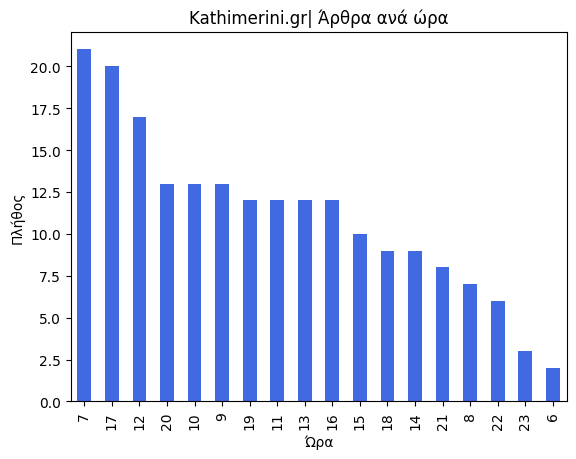

In [30]:
short_kathimerini['hour'].value_counts().plot(kind='bar', color='royalblue')
plt.xlabel('Ώρα')
plt.ylabel('Πλήθος')
plt.title('Kathimerini.gr| Άρθρα ανά ώρα')

Text(0.5, 1.0, 'Kathimerini.gr| Άρθρα ανά μέρα')

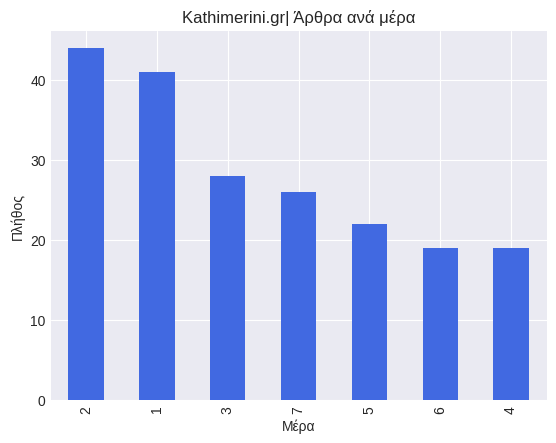

In [117]:
short_kathimerini['day'].value_counts().plot(kind='bar', color='royalblue')
plt.xlabel('Μέρα')
plt.ylabel('Πλήθος')
plt.title('Kathimerini.gr| Άρθρα ανά μέρα')

Text(0.5, 0, 'Kathimerini')

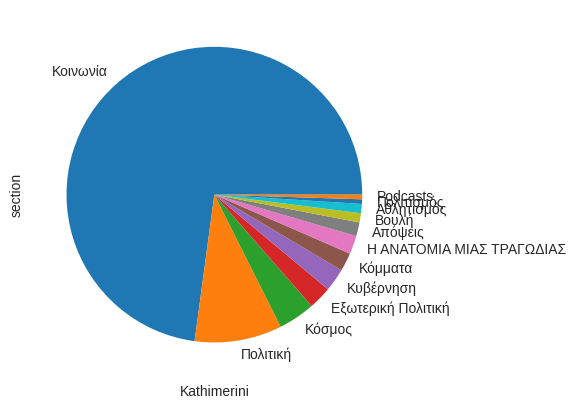

In [119]:
kathimerini_df1['section'].value_counts().plot(kind='pie')


In [120]:
kathimerini_df1['section'].value_counts()

Κοινωνία                     145
Πολιτική                      19
Κόσμος                         8
Εξωτερική Πολιτική             5
Κυβέρνηση                      5
Κόμματα                        4
Η ΑΝΑΤΟΜΙΑ ΜΙΑΣ ΤΡΑΓΩΔΙΑΣ      4
Απόψεις                        3
Βουλή                          2
Αθλητισμός                     2
Πολιτισμός                     1
Podcasts                       1
Name: section, dtype: int64

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
import spacy

In [34]:
pip install spacy

In [35]:
!python -m spacy download el_core_news_sm

2023-07-06 20:32:08.163307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 39.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [36]:
text = short_kathimerini['full_text'].str.cat(sep = ' ')

In [37]:
text

'Νέες συνομιλίες από τη βραδιά του τραγικού σιδηροδρομικού δυστυχήματος στα Τέμπη έρχονται στη δημοσιότητα. Πρόκειται για διαλόγους ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων, καθώς και ανάμεσα στον μοιραίο σταθμάρχη και τον ρυθμιστή κυκλοφορίας από την Αθήνα, τους οποίους φέρνει στο φως το «Πρώτο Θέμα». Η πρώτη συνομιλία – ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων – γίνεται λίγα λεπτά πριν την ολέθρια σύγκρουση και στη διάρκεια της, ο σταθμάρχης ενημερώνει πως «διώχνει το 62» – δηλαδή την επιβατική αμαξοστοιχία IC 62. Σταθμάρχης Λάρισας: ΕλαΣταθμάρχης Νέων Πόρων: Ελα, ΒασίληΣταθμάρχης Λάρισας: Τώρα σου διώχνω το 62Σταθμάρχης Νέων Πόρων: Ναι, έλα, διώξ’ το, και σε παίρνω μετά… πάρε με εσύ.Σταθμάρχης Λάρισας: Εγινε, έγινε Η δεύτερη συνομιλία – ανάμεσα στον σταθμάρχη Λάρισας και τον ρυθμιστή κυκλοφορίας από την Αθήνα – πραγματοποιείται στα 23:24, ελάχιστα μόλις λεπτά από τη στιγμή του δυστυχήματος. Εκεί ο ρυθμιστής κυκλοφορίας ενημερώνει τον σταθμάρχη Λάρ

In [38]:
nlp = spacy.load('el_core_news_sm')

In [39]:
list(nlp.Defaults.stop_words)[0:20]

['κάμποση',
 'λίγο',
 'πιο',
 'ετούτης',
 'ετέρου',
 'ετούτα',
 'μόνης',
 'πρόπερσι',
 'άλλος',
 'ίδιων',
 'πώς',
 'ποιός',
 'πού',
 'μέσα',
 'έτεροι',
 'είσαι',
 'ήσαστε',
 'όλης',
 'υπ',
 'ξαφνικά']

In [40]:
#nlp.Defaults.stop_words |= {"κ","κι","⇒", "Ειδήσεις", "σήμερα", "Ακολουθήστε", "kathimerini.grστο", "Google", "Newsκαι", "μάθετε", "πρώτοι", "όλες", "ειδήσεις", "Δείτε", "όλες", "τις", "τελευταίες", "Ειδήσειςαπό", "την", "Ελλάδα", "Κόσμο", "στοkathimerini.gr","kathimerini.gr"}

In [41]:
#nlp.Defaults.stop_words |= {"κ","κι","⇒ Ειδήσεις σήμερα Ακολουθήστε το kathimerini.grστο Google Newsκαι μάθετε πρώτοι όλες τις ειδήσεις Δείτε όλες τις τελευταίες Ειδήσειςαπό την Ελλάδα και τον Κόσμο, στοkathimerini.gr"}

In [42]:
nlp.Defaults.stop_words |= {"κ","κι","αναφέρω","αναφέρει","γίνομαι","σύμφωνα","υπάρχω"}

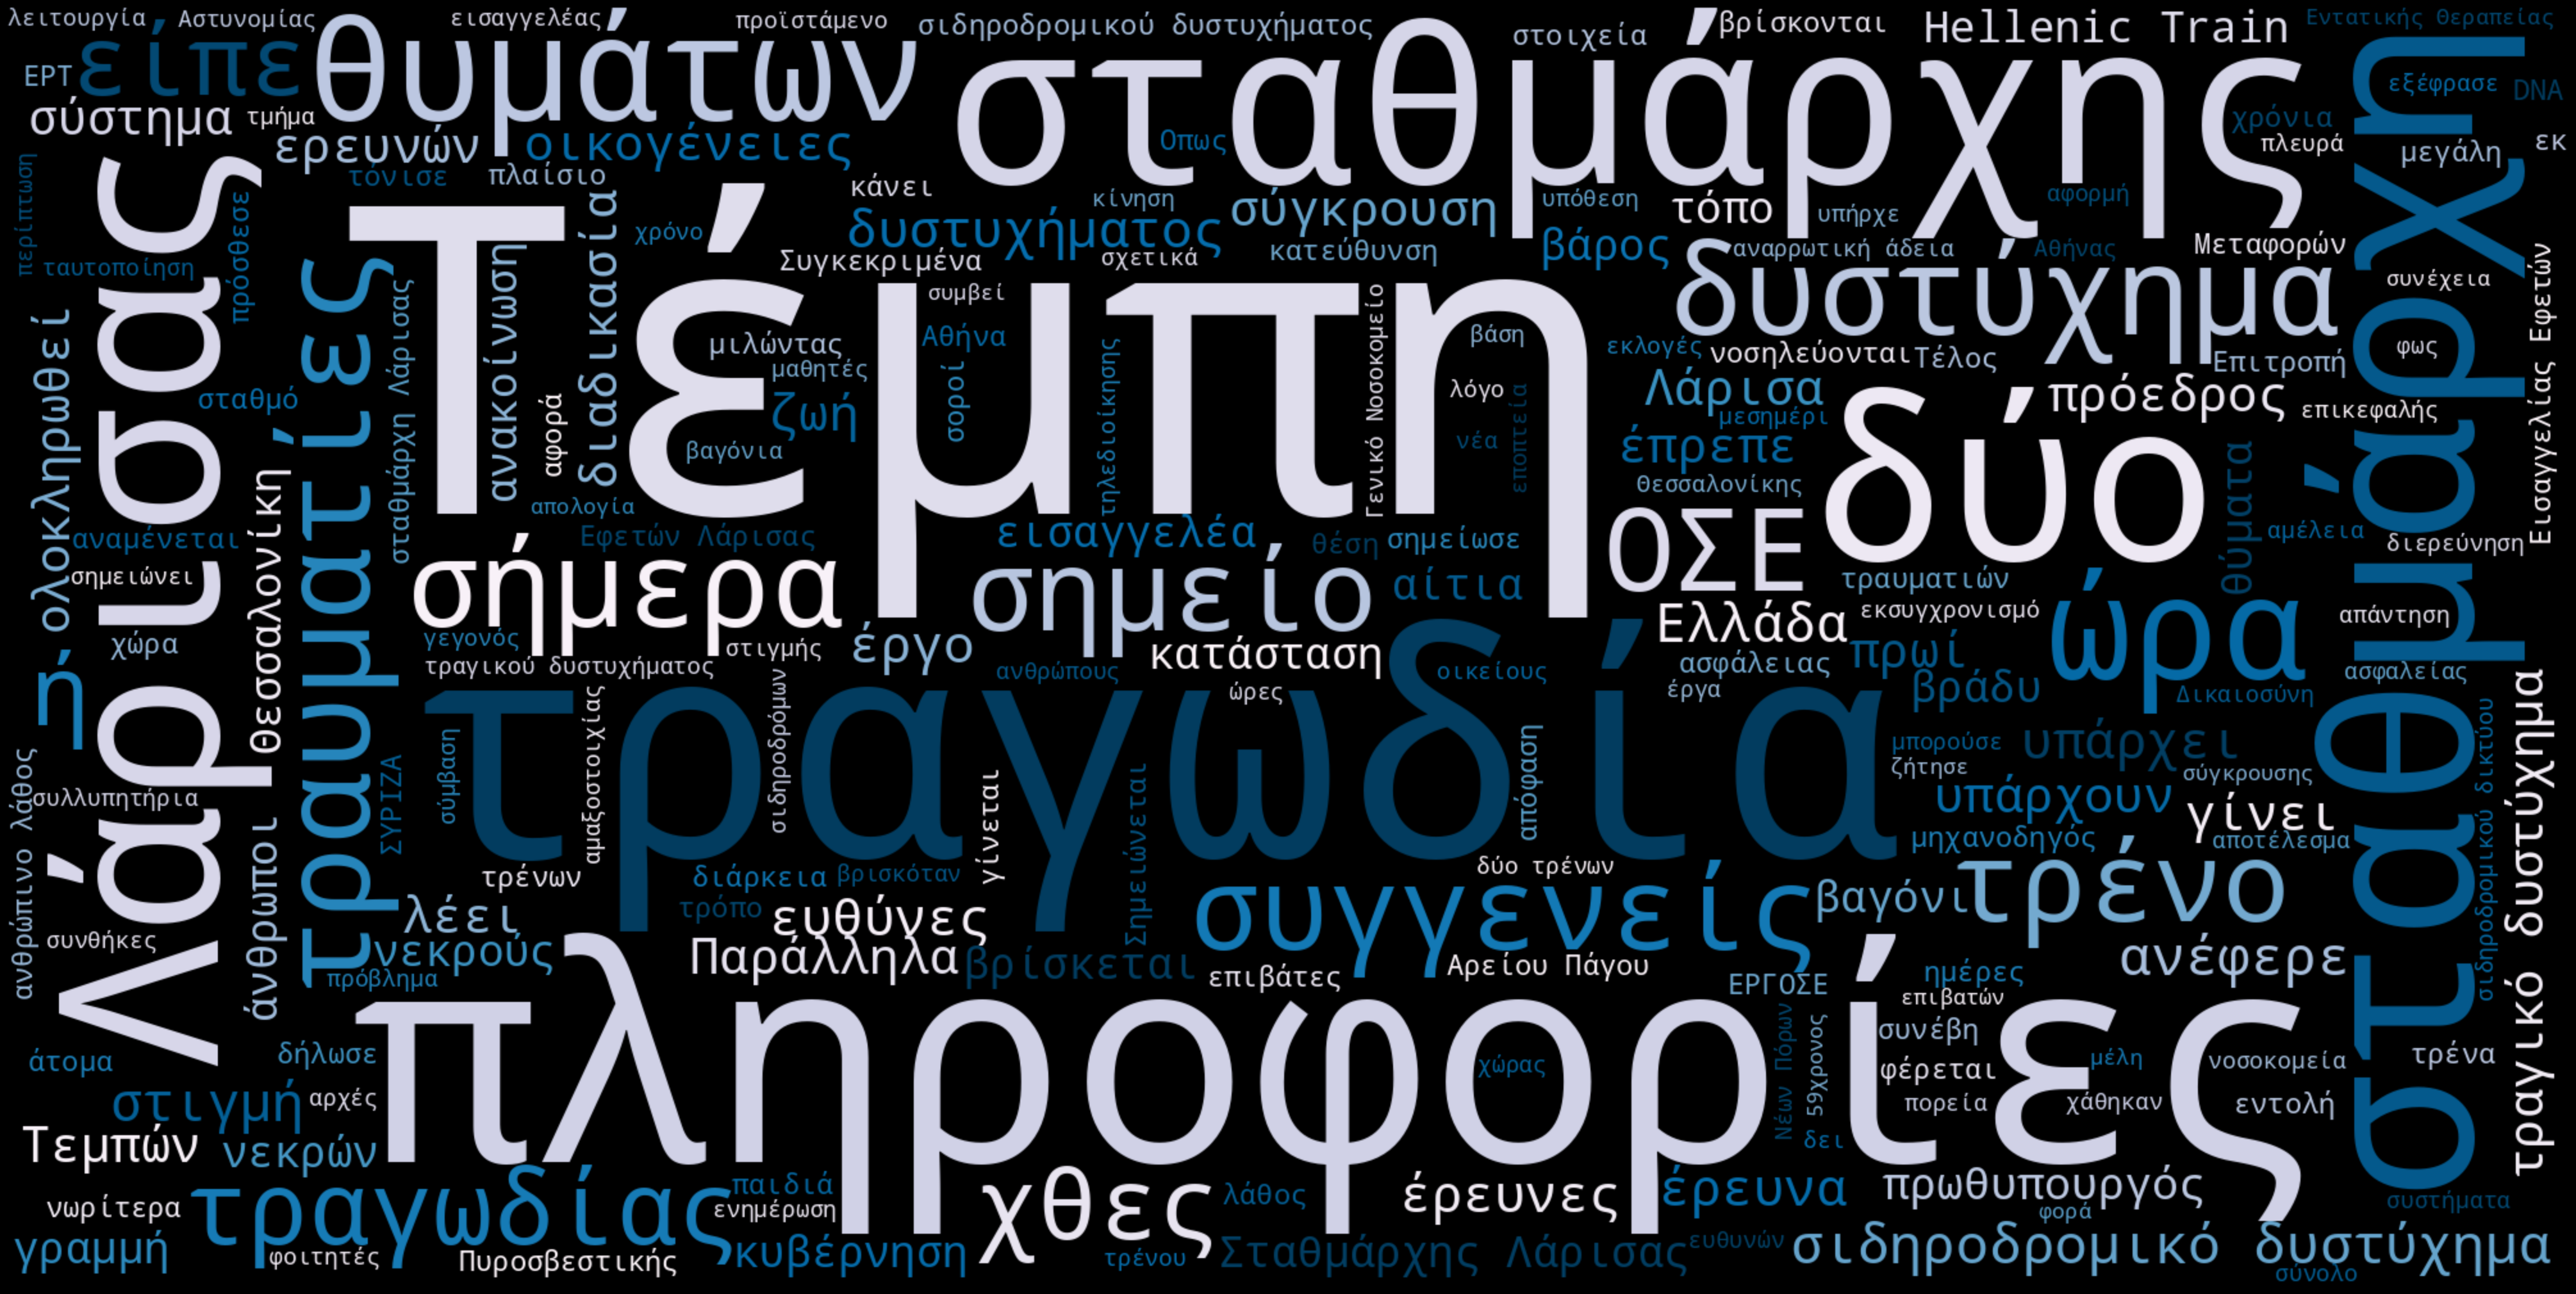

In [43]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='PuBu'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [44]:
doc = nlp(short_kathimerini['full_text'][1])

In [45]:
for token in doc:
    print(token, token.lemma_)

Το ο
προεδρείο προεδρείο
της ο
Ευρω-ομάδας Ευρω-ομάδα
των ο
Σοσιαλιστών σοσιαλιστής
και και
Δημοκρατών Δημοκρατών
( (
S&D S&D
) )
κατόπιν κατόπιν
πρόσκλησης πρόσκληση
του ο
προέδρου πρόεδρος
του ο
ΠΑΣΟΚ ΠΑΣΟΚ
, ,
Νίκου Νίκου
Ανδρουλάκη Ανδρουλάκη
θα θα
συνεδριάσει συνεδριάσει
το ο
διήμερο διήμερο
9 9
και και
10 10
Μαρτίου Μάρτιος
2023 2023
στην σε ο
Αθήνα Αθήνα
. .
Συγκεκριμένα συγκεκριμένα
, ,
την ο
Πέμπτη Πέμπτη
9 9
Μαρτίου Μάρτιος
στις σε ο
16:00 16:00
θα θα
πραγματοποιηθεί πραγματοποιώ
ανοιχτή ανοιχτός
συνεδρίαση συνεδρίαση
του ο
προεδρείου προεδρείου
της ο
Ευρω-ομάδας Ευρω-ομάδα
των ο
Σοσιαλιστών σοσιαλιστής
και και
Δημοκρατών Δημοκρατών
για για
την ο
κοινωνική κοινωνικός
κατοικία κατοικία
, ,
την ο
προστασία προστασία
της ο
πρώτης πρώτος
κατοικίας κατοικία
των ο
αδύναμων αδύναμος
δανειοληπτών δανειοληπτής
και και
την ο
εργασιακή εργασιακός
επισφάλεια επισφάλεια
των ο
νέων νέος
στην σε ο
Τεχνόπολη τεχνόπολη
στο σε ο
Γκάζι Γκάζι
. .
Επιπλέον επιπλέον
, ,
την ο
Παρασκευή Παρασκευή
1

In [46]:
' '.join(token.lemma_ for token in doc)

'ο προεδρείο ο Ευρω-ομάδα ο σοσιαλιστής και Δημοκρατών ( S&D ) κατόπιν πρόσκληση ο πρόεδρος ο ΠΑΣΟΚ , Νίκου Ανδρουλάκη θα συνεδριάσει ο διήμερο 9 και 10 Μάρτιος 2023 σε ο Αθήνα . συγκεκριμένα , ο Πέμπτη 9 Μάρτιος σε ο 16:00 θα πραγματοποιώ ανοιχτός συνεδρίαση ο προεδρείου ο Ευρω-ομάδα ο σοσιαλιστής και Δημοκρατών για ο κοινωνικός κατοικία , ο προστασία ο πρώτος κατοικία ο αδύναμος δανειοληπτής και ο εργασιακός επισφάλεια ο νέος σε ο τεχνόπολη σε ο Γκάζι . επιπλέον , ο Παρασκευή 10 Μάρτιος σε ο 9:00 ο ευρωβουλευτής θα ξεναγώ σε ο Μουσείο ο Ακρόπολη και θα ενημερωθούν για ο διαχρονικός αίτημα ο επιστροφή ο γλυπτής ο Παρθενώνα από ο Βρετανικός Μουσείο . Ακολούθως θα λαμβάνω χώρα κλειστής συνεδρίαση ο Προεδρείου για ο κράτος δικαίου σε ο Ελλάδα με προσκεκλημένους ομιλητής ο Ευάγγελο Βενιζέλος , πρώην πρόεδρος ο ΠΑΣΟΚ , πρώην αντιπρόεδρο ο κυβέρνηση και καθηγητής ο Συνταγματικού Δικαίου σε ο Αριστοτέλειο πανεπιστήμιος Θεσσαλονίκη καθώς και ο δημοσιογράφος Τάσο Τέλλογλου και Γιάννης Σουλιώτη

In [47]:
text

'Νέες συνομιλίες από τη βραδιά του τραγικού σιδηροδρομικού δυστυχήματος στα Τέμπη έρχονται στη δημοσιότητα. Πρόκειται για διαλόγους ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων, καθώς και ανάμεσα στον μοιραίο σταθμάρχη και τον ρυθμιστή κυκλοφορίας από την Αθήνα, τους οποίους φέρνει στο φως το «Πρώτο Θέμα». Η πρώτη συνομιλία – ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων – γίνεται λίγα λεπτά πριν την ολέθρια σύγκρουση και στη διάρκεια της, ο σταθμάρχης ενημερώνει πως «διώχνει το 62» – δηλαδή την επιβατική αμαξοστοιχία IC 62. Σταθμάρχης Λάρισας: ΕλαΣταθμάρχης Νέων Πόρων: Ελα, ΒασίληΣταθμάρχης Λάρισας: Τώρα σου διώχνω το 62Σταθμάρχης Νέων Πόρων: Ναι, έλα, διώξ’ το, και σε παίρνω μετά… πάρε με εσύ.Σταθμάρχης Λάρισας: Εγινε, έγινε Η δεύτερη συνομιλία – ανάμεσα στον σταθμάρχη Λάρισας και τον ρυθμιστή κυκλοφορίας από την Αθήνα – πραγματοποιείται στα 23:24, ελάχιστα μόλις λεπτά από τη στιγμή του δυστυχήματος. Εκεί ο ρυθμιστής κυκλοφορίας ενημερώνει τον σταθμάρχη Λάρ

In [48]:
full_doc = nlp(text)

In [49]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [50]:
clear_text[200:400]

'εσα σε ο μοιραίος σταθμάρχης και ο ρυθμιστή κυκλοφορία από ο Αθήνα , ο οποίος φέρνει σε ο φως ο « Πρώτο Θέμα » . ο πρώτος συνομιλία – ανάμεσα σε ο σταθμάρχης Λάρισας και ο σταθμάρχη Νέος Πόρων – γίνομ'

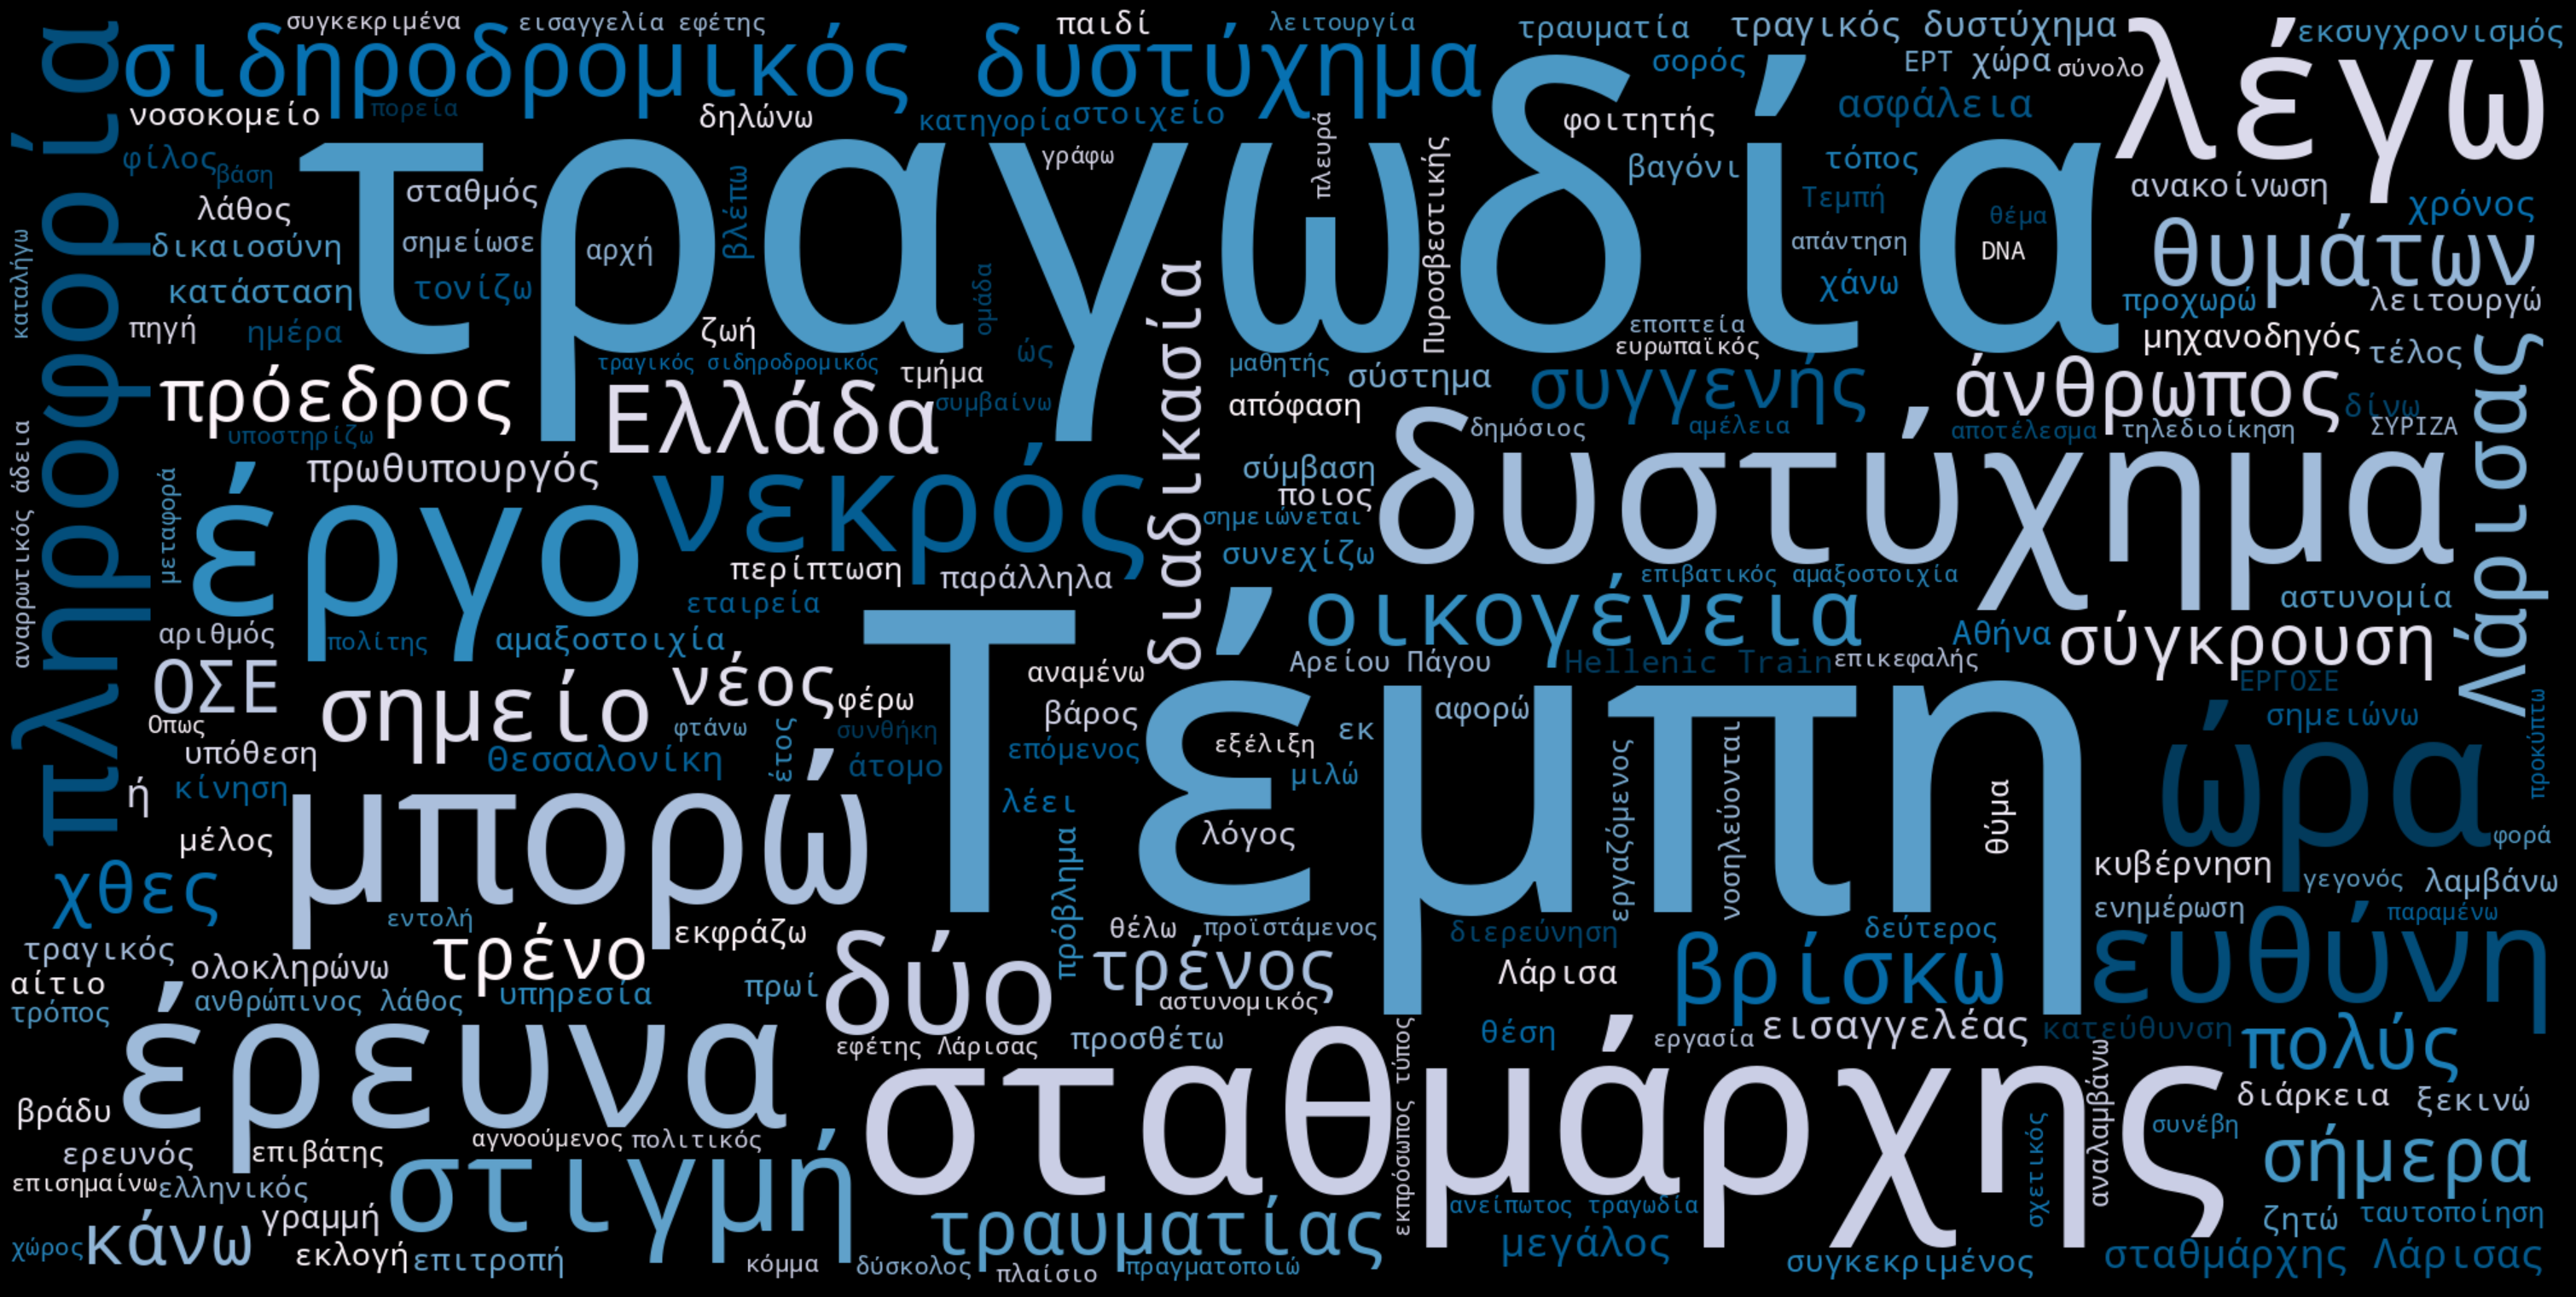

In [51]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='PuBu'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [53]:
short_kathimerini = short_kathimerini.dropna(subset=['full_text'])

In [54]:
count_vector = cv.fit_transform(short_kathimerini['full_text'])

In [55]:
count_vector.shape

(199, 10293)

In [56]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  02  03  04  05  06  09  10  100  ...  ύψη  ύψος  ύψους  ώμο  ώρα  \
0   2    0   0   0   0   0   1   0   0    0  ...    0     0      0    0    0   
1   2    0   0   0   0   0   0   0   2    0  ...    0     0      0    0    0   
2   0    0   0   0   0   0   0   0   0    0  ...    0     0      0    0    0   
3   7    0   0   0   0   1   0   1   2    0  ...    0     0      0    0    1   
4   0    0   0   0   0   0   0   0   0    0  ...    0     0      0    0    0   

   ώρας  ώρες  ώς  ώσπου  ώστε  
0     0     0   0      0     0  
1     0     0   0      0     0  
2     0     0   0      0     0  
3     0     0   0      0     2  
4     0     0   0      0     0  

[5 rows x 10293 columns]

In [57]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words)

In [58]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

δυστυχήματος  δυστύχημα  δύο  θυμάτων  λάθος  λάρισας  πληροφορίες  σήμερα  \
0             3          0    1        0      0       49            0       3   
1             0          0    0        0      0        0            1       0   
2             0          1    0        0      0        0            0       1   
3             0          1    2        0      1        3            0       1   
4             0          0    0        1      0        0            0       2   

   σημείο  σιδηροδρομικό  σταθμάρχη  σταθμάρχης  τέμπη  τρένο  τραγικό  \
0       2              0         16          52      2      6        0   
1       0              0          0           0      1      0        0   
2       0              1          0           0      1      0        0   
3       0              1          4           5      1      0        0   
4       0              0          0           0      1      0        0   

   τραγωδία  τραγωδίας  τραυματίες  χθες  ώρα  
0         0          0           0     0    0  
1         0          1           0     0    0  
2         0          0           0     2    0  
3         0          0           0     1    1  
4         0          4           0     0    0

In [59]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bσταθμ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

σταθμάρ  σταθμάρχες  σταθμάρχη  σταθμάρχης  σταθμαρχείο  σταθμαρχείου  \
0        0           0         16          52            0             0   
1        0           0          0           0            0             0   
2        0           0          0           0            0             0   
3        0           0          4           5            1             0   
4        0           0          0           0            0             0   

   σταθμαρχω  σταθμαρχών  σταθμοί  σταθμού  σταθμούς  σταθμό  σταθμών  
0          0           0        0        0         0       0        0  
1          0           0        0        0         0       0        0  
2          0           0        0        0         0       0        0  
3          0           0        0        0         1       5        0  
4          0           0        0        0         0       0        0

In [60]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results1.head()

hellenic train  αναρρωτική άδεια  ανθρώπινο λάθος  αρείου πάγου  \
0               0                 0                0             0   
1               0                 0                0             0   
2               0                 0                0             0   
3               0                 1                0             0   
4               0                 0                0             0   

   διαδικασία ταυτοποίησης  δυστυχήματος τέμπη  δυστύχημα τέμπη  \
0                        0                   1                0   
1                        0                   0                0   
2                        0                   0                0   
3                        0                   0                0   
4                        0                   0                0   

   εισαγγελίας εφετών  εφετών λάρισας  νοσοκομείο λάρισας  \
0                   0               0                   0   
1                   0               0                   0   
2                   0               0                   0   
3                   0               0                   0   
4                   0               0                   0   

   οικογένειες θυμάτων  σιδηροδρομικού δικτύου  σιδηροδρομικού δυστυχήματος  \
0                    0                       0                            1   
1                    0                       0                            0   
2                    0                       0                            0   
3                    0                       0                            0   
4                    0                       0                            0   

   σιδηροδρομικό δυστύχημα  σταθμάρχη λάρισας  σταθμάρχης λάρισας  \
0                        0                  7                  33   
1                        0                  0                   0   
2                        1                  0                   0   
3                        0                  0                   0   
4                        0                  0                   0   

   τραγικού δυστυχήματος  τραγικό δυστύχημα  τραγωδία τέμπη  τραγωδίας τέμπη  
0                      0                  0               0                0  
1                      0                  0               0                1  
2                      0                  0               0                0  
3                      0                  0               0                0  
4                      0                  0               0                1

In [124]:
results1.sum(axis =0).sort_values(ascending = False)

σιδηροδρομικό δυστύχημα        76
δυστύχημα τέμπη                67
σταθμάρχης λάρισας             64
τραγωδία τέμπη                 58
τραγικό δυστύχημα              53
hellenic train                 43
δυστυχήματος τέμπη             42
σιδηροδρομικού δυστυχήματος    40
αρείου πάγου                   38
εφετών λάρισας                 36
σταθμάρχη λάρισας              35
ανθρώπινο λάθος                33
εισαγγελίας εφετών             33
νοσοκομείο λάρισας             33
διαδικασία ταυτοποίησης        32
τραγωδίας τέμπη                30
τραγικού δυστυχήματος          29
αναρρωτική άδεια               27
οικογένειες θυμάτων            27
σιδηροδρομικού δικτύου         25
dtype: int64

Text(0, 0.5, 'Διγράμματα')

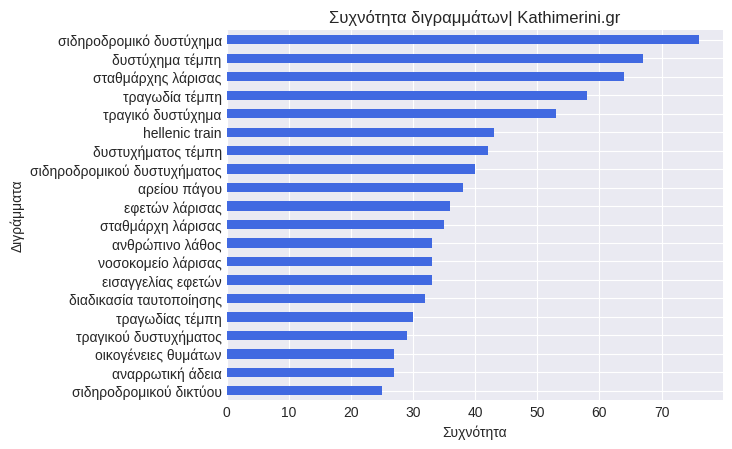

In [123]:
results1.sum(axis =0).sort_values(ascending = True).plot(kind='barh', color='royalblue')
plt.title('Συχνότητα διγραμμάτων| Kathimerini.gr')
plt.xlabel('Συχνότητα')
plt.ylabel('Διγράμματα')

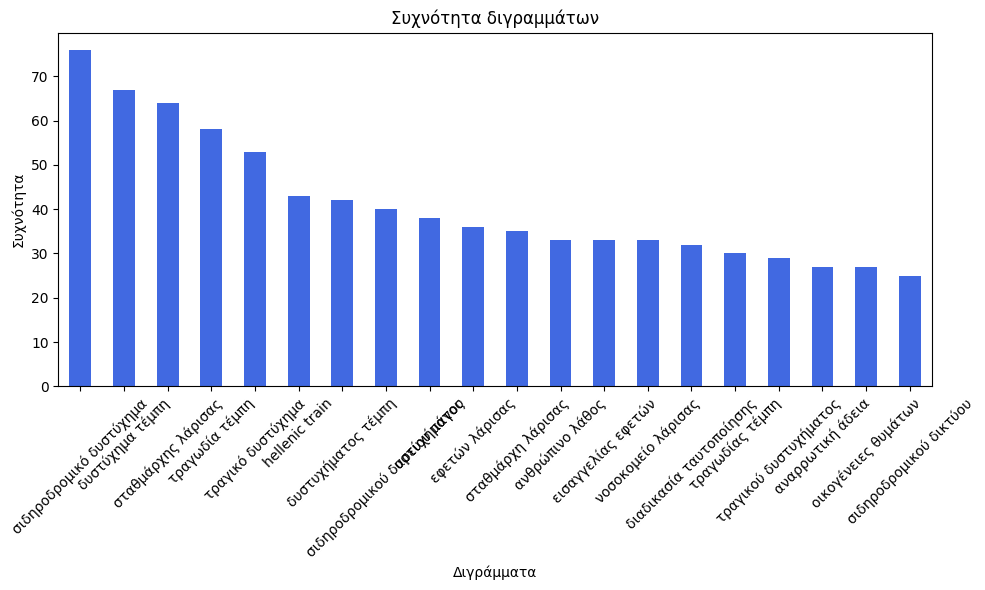

In [62]:
word_freq1 = results1.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
word_freq1.plot(kind='bar', color='royalblue')
plt.title('Συχνότητα διγραμμάτων')
plt.xlabel('Διγράμματα')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(3, 3))
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results3.head()

ανθρωποκτονίες αμέλεια συρροή  βάση πρόσφατη τροποποίηση  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   βλάβες ποινικό χαρακτηρισμό  γενικό νοσοκομείο λάρισας  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   δέκα χρόνια κάθειρξη  διατάραξης ασφάλειας συγκοινωνιών  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   εισαγγελέα αρείου πάγου  εισαγγελίας εφετών λάρισας  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   εφετών λάρισας σταμάτης  κατηγορία διατάραξης ασφάλειας  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   λάρισας σταμάτης δασκαλόπουλος  ποινές δέκα χρόνια  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               0                   0   

   πρωθυπουργός κυριάκος μητσοτάκης  πρόσφατη τροποποίηση ποινικού  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   

   σιδηροδρομικού δυστυχήματος τέμπη  σιδηροδρομικό δυστύχημα τέμπη  \
0                                  1                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   τραγικό δυστύχημα τέμπη  τραγικό σιδηροδρομικό δυστύχημα  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   τροποποίηση ποινικού κώδικα  χρόνια κάθειρξη ισόβια  
0                            0                       0  
1                            0                       0  
2                            0                       0  
3                            0                       0  
4                            0                       0

In [64]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(4, 4))
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results4 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results4.head()

αρείου πάγου ισίδωρος ντογιάκος  αρείου πάγου ισίδωρου ντογιάκου  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   βάση πρόσφατη τροποποίηση ποινικού  δέκα χρόνια κάθειρξη ισόβια  \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   

   δευτέρας κίνηση τρένων μεγάλη  εισαγγελέα αρείου πάγου ισίδωρου  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   εισαγγελέας αρείου πάγου ισίδωρος  εισαγγελίας εφετών λάρισας σταμάτη  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   εισαγγελίας εφετών λάρισας σταμάτης  εφετών λάρισας σταμάτη δασκαλόπουλο  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   εφετών λάρισας σταμάτης δασκαλόπουλος  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   κατηγορία διατάραξης ασφάλειας συγκοινωνιών  ποινές δέκα χρόνια κάθειρξη  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   προϊστάμενο εισαγγελίας εφετών λάρισας  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   προϊστάμενος εισαγγελίας εφετών λάρισας  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   πρόσφατη τροποποίηση ποινικού κώδικα  πόστο λάρισας διάρκεια τριημέρου  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   σωματικές βλάβες ποινικό χαρακτηρισμό  \
0      

In [65]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['ευθύνη','υποδομή', 'κυβέρνηση', 'νδ','νέα δημοκρατία', 'συριζα','αντιπολίτευση'])
count_vector = cv.fit_transform(short_kathimerini['full_text'])
results5 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results5.head()

ευθύνη  υποδομή  κυβέρνηση  νδ  νέα δημοκρατία  συριζα  αντιπολίτευση
0       0        0          0   0               0       0              0
1       0        0          0   0               0       0              0
2       0        0          0   0               0       0              0
3       0        0          0   0               0       0              0
4       0        0          0   0               0       0              0

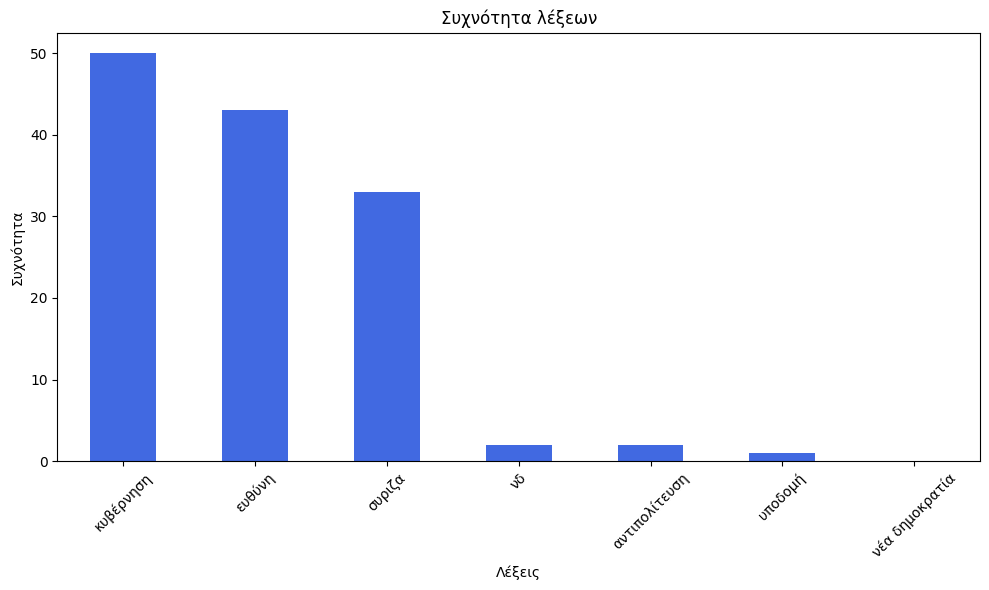

In [66]:
plt.figure(figsize=(10, 6))
results5.sum(axis=0).sort_values(ascending=False).plot(kind='bar', color='royalblue')
plt.title('Συχνότητα λέξεων')
plt.xlabel('Λέξεις')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_kathimerini['full_text'])

In [69]:
results6 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results6.head()

00        10   11   12   14   15   20  2017  2018  2021  ...  \
0  0.031425  0.000000  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
1  0.285445  0.269185  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
3  0.467819  0.126048  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   

   χαρακτηριστικά      χθες  χθεσινή  χρόνια  χρόνο      χώρα     χώρας  χώρο  \
0             0.0  0.000000      0.0     0.0    0.0  0.000000  0.000000   0.0   
1             0.0  0.000000      0.0     0.0    0.0  0.129375  0.000000   0.0   
2             0.0  0.214707      0.0     0.0    0.0  0.000000  0.000000   0.0   
3             0.0  0.045651      0.0     0.0    0.0  0.000000  0.064837   0.0   
4             0.0  0.000000      0.0     0.0    0.0  0.000000  0.000000   0.0   

        ώρα  ώρες  
0  0.000000   0.0  
1  0.000000   0.0  
2  0.000000   0.0  
3  0.041133   0.0  
4  0.000000   0.0  

[5 rows x 500 columns]

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.00000000e+00 4.60302938e-02 3.87865854e-03 2.47487875e-01
  8.10923934e-03 2.68661431e-02 7.47892593e-02 1.80129768e-02
  5.58337817e-02 1.62772436e-03 1.25875896e-02 1.89185283e-02
  2.59912627e-01 1.57572086e-02 1.22291590e-02 2.64595320e-01
  1.26144650e-01 3.08879320e-02 3.96992033e-02 2.05939418e-02
  1.27699985e-02 1.11672160e-01 6.33466838e-02 9.62635968e-02
  1.17055000e-01 7.93074981e-02 5.42081941e-02 3.44925201e-01
  1.52483997e-01 3.69866483e-02 6.71118039e-03 5.80724504e-02
  3.05072349e-02 1.22814606e-01 1.23102494e-01 1.52083536e-02
  1.20649094e-01 1.34907146e-01 1.87572762e-01 1.13542469e-02
  2.38603625e-01 2.68905365e-01 4.26901838e-03 4.41924662e-03
  3.63874960e-01 2.74745252e-02 6.26399249e-02 6.74150666e-03
  7.20886612e-03 2.85391528e-01 5.20736935e-02 1.13862272e-03
  1.49884814e-02 1.78381646e-02 9.76923336e-02 4.16942678e-02
  6.36386400e-03 7.55402942e-04 5.28138521e-02 1.82482349e-01
  1.43323173e-01 2.56690011e-01 2.39507814e-01 2.66

In [71]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

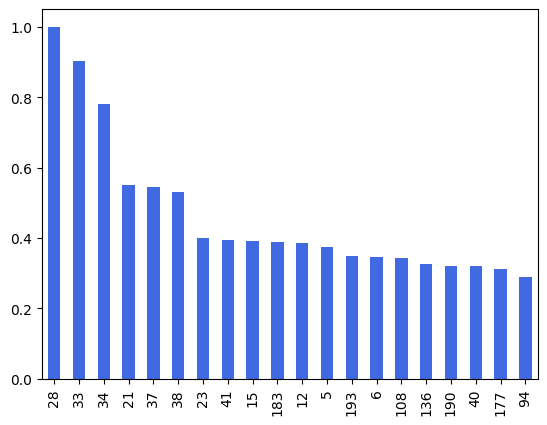

In [72]:
pd.DataFrame(arr).loc[28].sort_values(ascending = False).head(20).plot(kind = 'bar', color='royalblue')

In [73]:
short_kathimerini['full_text'].loc[28]

'Δύο συγγενείς θυμάτων καταθέτουν αυτήν την ώρα στην ανακρίτρια Λάρισας, αναφορικά με το σιδηροδρομικό δυστύχημα στα Τέμπη. Την πόρτα του ανακριτή νωρίτερα πέρασε ο σταθμάρχης της επόμενης βάρδιας μετά το δυστύχημα σύμφωνα με το ΑΠΕ-ΜΠΕ, ώστε να δώσει πληροφορίες στον ανακριτή για τα αίτια του δυστυχήματος και την απόδοση των ευθυνών. Οπως αναφέρεται στην τελευταία ενημέρωση για το συντονιστικό έργο στο πεδίο του κυβερνητικού κλιμακίου υπό τον υφυπουργό στον Πρωθυπουργό Χρ. Τριαντόπουλο στη Λάρισα: Σημειώνεται πάντως ότι νωρίτερα, ο δικηγόρος της οικογένειας 33χρονου μετανάστη από το Μπαγκαντές ανέφερε ότι ταυτοποιήθηκαν τα στοιχεία του προ ολίγων ωρών. Την αναβάθμιση των ερευνών για το τραγικό δυστύχημα στα Τέμπη δρομολόγησε στο μεταξύ ο προϊστάμενος της Εισαγγελίας Εφετών Λάρισας, Σταμάτης Δασκαλόπουλος, ο οποίος έχει οριστεί από τον εισαγγελέα του Αρείου Πάγου ως υπεύθυνος για την εποπτεία του συνόλου των ερευνών. O κ. Δασκαλόπουλος με έγγραφο του, λόγω της σοβαρότητας της υπόθεσης,

In [74]:
short_kathimerini['full_text'].loc[33]

'Ταυτοποιήθηκαν τα στοιχεία ενός ακόμη θύματος της σιδηροδρομικής τραγωδίας στα Τέμπη. Πρόκειται για τον 33χρονο Μοχαμάντ-Εντρίζ Μία από το Μπαγκλαντές, ο οποίος επέβαινε στη μοιραία αμαξοστοιχία IC-62 και ταξίδευε από την Αθήνα προς τη Θεσσαλονίκη, όπως επιβεβαίωσε, μιλώντας στο ΑΠΕ-ΜΠΕ, ο δικηγόρος της οικογενείας του άτυχου μετανάστη. Τα στοιχεία του δεν είχαν καταστεί εφικτό να ταυτοποιηθούν, κάτι που έγινε όμως μόλις πριν από λίγες ώρες. Σύμφωνα με όσα ανέφερε ο δικηγόρος Θανάσης Χατζάκος, δείγμα DNA από τον 33χρονο ελήφθη από οδοντόβουρτσα που υπήρχε στο σπίτι του και ταυτοποιήθηκε με βιολογικό υλικό, το οποίο συγκεντρώθηκε από τον τόπο του δυστυχήματος. Κατά τον κ. Χατζάκο, ο Μοχαμάντ-Εντρίζ Μία εργαζόταν στην Ελλάδα ως μικροπωλητής και είχε μεταβεί για τις ανάγκες της δουλειάς του στην Αθήνα. Την εξαφάνισή του είχε δηλώσει στις αστυνομικές αρχές ένας φίλος του (ομοεθνής), ο οποίος γνώριζε για το ταξίδι. Την αναβάθμιση των ερευνών για το τραγικό δυστύχημα στα Τέμπη δρομολόγησε ο

In [75]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

In [76]:
import seaborn as sns

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

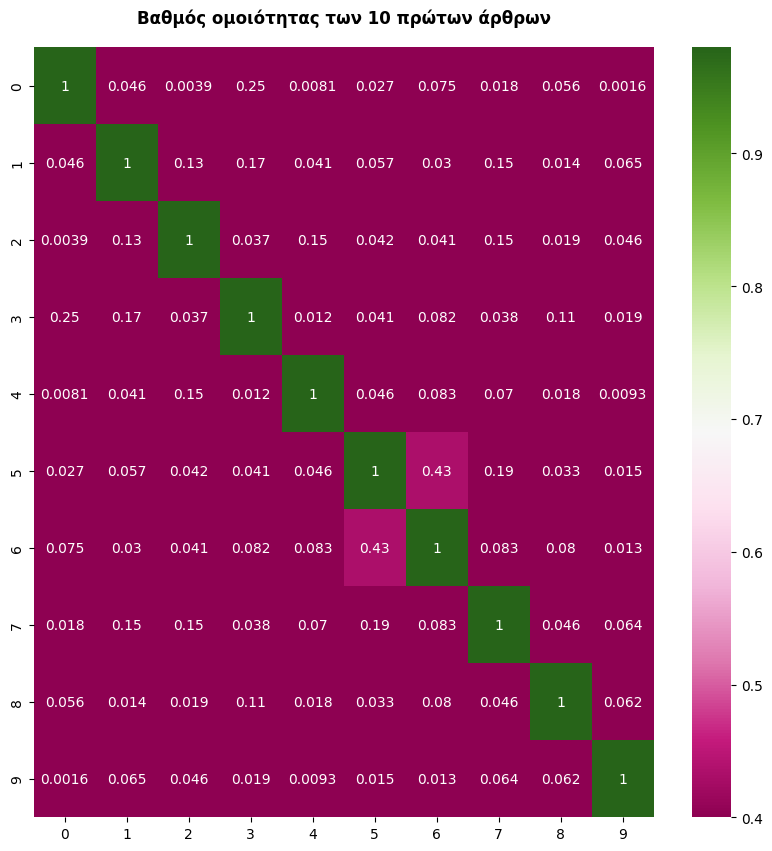

In [77]:
plt.figure(figsize=(10, 10))

plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.40, vmax=0.98, cmap="PiYG")

In [78]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer


In [79]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [80]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [81]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [82]:
len(short_kathimerini)

199

In [83]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [84]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [85]:
matrix = vec.fit_transform(short_kathimerini['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'αναφερει', 'αναφερω', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γινομαι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτ

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    1     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [86]:
wordcount_df.shape

(199, 13161)

In [87]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [88]:
wordcount_df[trust_words].sum(axis=1)

0       9
1       4
2       1
3       5
4       2
       ..
194    11
195     6
196     1
197     1
198     6
Length: 199, dtype: int64

In [89]:
short_kathimerini['anger'] = wordcount_df[angry_words].sum(axis=1)

short_kathimerini['positive'] = wordcount_df[positive_words].sum(axis=1)

short_kathimerini['joy'] = wordcount_df[joy_words].sum(axis=1)

short_kathimerini['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_kathimerini['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_kathimerini['trust'] = wordcount_df[trust_words].sum(axis=1)

short_kathimerini['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_kathimerini['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_kathimerini['negative'] = wordcount_df[negative_words].sum(axis=1)

short_kathimerini['fear'] = wordcount_df[fear_words].sum(axis=1)

short_kathimerini['anger_per'] = wordcount_df[angry_words].sum(axis=1)

In [90]:
short_kathimerini1 = short_kathimerini.copy()
short_kathimerini1.head()

date  \
0 2023-03-07 20:48:42+02:00   
1 2023-03-07 19:56:41+02:00   
2 2023-03-07 19:57:56+02:00   
3 2023-03-07 17:40:58+02:00   
4 2023-03-07 16:43:12+02:00   

                                           full_text  year  month  day  hour  \
0  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...  2023      3    7    20   
1  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...  2023      3    7    19   
2  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...  2023      3    7    19   
3  Nέα στοιχεία για την απολογία του σταθμάρχη εν...  2023      3    7    17   
4  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...  2023      3    7    16   

   anger  positive  joy  disgust  surprise  trust  anticipation  sadness  \
0      4        14    2        8         5      9             6       13   
1      0         5    1        0         0      4             1        1   
2      3         1    0        3         1      1             1        1   
3      4        12    4        1         6      5             6       10   
4      5         2    0        0         1      2             4        4   

   negative  fear  anger_per  
0        21    12          4  
1         2     2          0  
2         4     1          3  
3        14     8          4  
4         8     4          5

In [91]:
#total_words = wordcount_df.sum(axis=1)

#short_avgi1['anger_per'] = (wordcount_df[angry_words].sum(axis=1) / total_words) * 100
#short_avgi1['positive_per'] = (wordcount_df[positive_words].sum(axis=1) / total_words) * 100
#short_avgi1['joy_per'] = (wordcount_df[joy_words].sum(axis=1) / total_words) * 100
#short_avgi1['disgust_per'] = (wordcount_df[disgust_words].sum(axis=1) / total_words) * 100
#short_avgi1['surprise_per'] = (wordcount_df[surprise_words].sum(axis=1) / total_words) * 100
#short_avgi1['trust_per'] = (wordcount_df[trust_words].sum(axis=1) / total_words) * 100
#short_avgi1['anticipation_per'] = (wordcount_df[anticipation_words].sum(axis=1) / total_words) * 100
#short_avgi1['sadness_per'] = (wordcount_df[sadness_words].sum(axis=1) / total_words) * 100
#short_avgi1['negative_per'] = (wordcount_df[negative_words].sum(axis=1) / total_words) * 100
#short_avgi1['fear_per'] = (wordcount_df[fear_words].sum(axis=1) / total_words) * 100

In [92]:
short_kathimerini1 = short_kathimerini1.drop(['anger_per'], axis=1)

In [93]:
short_kathimerini1.head()

date  \
0 2023-03-07 20:48:42+02:00   
1 2023-03-07 19:56:41+02:00   
2 2023-03-07 19:57:56+02:00   
3 2023-03-07 17:40:58+02:00   
4 2023-03-07 16:43:12+02:00   

                                           full_text  year  month  day  hour  \
0  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...  2023      3    7    20   
1  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...  2023      3    7    19   
2  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...  2023      3    7    19   
3  Nέα στοιχεία για την απολογία του σταθμάρχη εν...  2023      3    7    17   
4  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...  2023      3    7    16   

   anger  positive  joy  disgust  surprise  trust  anticipation  sadness  \
0      4        14    2        8         5      9             6       13   
1      0         5    1        0         0      4             1        1   
2      3         1    0        3         1      1             1        1   
3      4        12    4        1         6      5             6       10   
4      5         2    0        0         1      2             4        4   

   negative  fear  
0        21    12  
1         2     2  
2         4     1  
3        14     8  
4         8     4

In [94]:

short_kathimerini1['total_words'] = short_kathimerini1['full_text'].str.split().apply(len)

short_kathimerini1['anger_per'] = (short_kathimerini1['anger'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['positive_per'] = (short_kathimerini1['positive'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['joy_per'] = (short_kathimerini1['joy'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['disgust_per'] = (short_kathimerini1['disgust'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['surprise_per'] = (short_kathimerini1['surprise'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['trust_per'] = (short_kathimerini1['trust'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['anticipation_per'] = (short_kathimerini1['anticipation'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['sadness_per'] = (short_kathimerini1['sadness'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['negative_per'] = (short_kathimerini1['negative'] / short_kathimerini1['total_words']) * 100
short_kathimerini1['fear_per'] = (short_kathimerini1['fear'] / short_kathimerini1['total_words']) * 100

short_avgi1 = short_kathimerini1.drop('total_words', axis=1)
short_avgi1.head()



date  \
0 2023-03-07 20:48:42+02:00   
1 2023-03-07 19:56:41+02:00   
2 2023-03-07 19:57:56+02:00   
3 2023-03-07 17:40:58+02:00   
4 2023-03-07 16:43:12+02:00   

                                           full_text  year  month  day  hour  \
0  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...  2023      3    7    20   
1  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...  2023      3    7    19   
2  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...  2023      3    7    19   
3  Nέα στοιχεία για την απολογία του σταθμάρχη εν...  2023      3    7    17   
4  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...  2023      3    7    16   

   anger  positive  joy  disgust  ...  anger_per  positive_per   joy_per  \
0      4        14    2        8  ...   0.449944      1.574803  0.224972   
1      0         5    1        0  ...   0.000000      1.923077  0.384615   
2      3         1    0        3  ...   1.875000      0.625000  0.000000   
3      4        12    4        1  ...   0.787402      2.362205  0.787402   
4      5         2    0        0  ...   3.144654      1.257862  0.000000   

   disgust_per  surprise_per  trust_per  anticipation_per  sadness_per  \
0     0.899888      0.562430   1.012373          0.674916     1.462317   
1     0.000000      0.000000   1.538462          0.384615     0.384615   
2     1.875000      0.625000   0.625000          0.625000     0.625000   
3     0.196850      1.181102   0.984252          1.181102     1.968504   
4     0.000000      0.628931   1.257862          2.515723     2.515723   

   negative_per  fear_per  
0      2.362205  1.349831  
1      0.769231  0.769231  
2      2.500000  0.625000  
3      2.755906  1.574803  
4      5.031447  2.515723  

[5 rows x 26 columns]

In [95]:
short_kathimerini1.keys()

Index(['date', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'total_words', 'anger_per',
       'positive_per', 'joy_per', 'disgust_per', 'surprise_per', 'trust_per',
       'anticipation_per', 'sadness_per', 'negative_per', 'fear_per'],
      dtype='object')

In [96]:
short_kathimerini1.reset_index(inplace=True)
short_kathimerini1.set_index('date', inplace=True)
short_kathimerini1

index  \
date                               
2023-03-07 20:48:42+02:00      0   
2023-03-07 19:56:41+02:00      1   
2023-03-07 19:57:56+02:00      2   
2023-03-07 17:40:58+02:00      3   
2023-03-07 16:43:12+02:00      4   
...                          ...   
2023-03-01 10:54:30+02:00    194   
2023-03-01 10:41:17+02:00    195   
2023-03-01 10:15:26+02:00    196   
2023-03-01 09:53:23+02:00    197   
2023-03-01 08:36:08+02:00    198   

                                                                   full_text  \
date                                                                           
2023-03-07 20:48:42+02:00  Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...   
2023-03-07 19:56:41+02:00  Το προεδρείο της Ευρω-ομάδας των Σοσιαλιστών κ...   
2023-03-07 19:57:56+02:00  Έλληνες της Διασποράς ενώνουν τις φωνές τους μ...   
2023-03-07 17:40:58+02:00  Nέα στοιχεία για την απολογία του σταθμάρχη εν...   
2023-03-07 16:43:12+02:00  «Η Ένωση Δικαστών και Εισαγγελέων, παρακολουθε...   
...                                                                      ...   
2023-03-01 10:54:30+02:00  Σε σοβαρές καταγγελίες για το σιδηροδρομικό δυ...   
2023-03-01 10:41:17+02:00  Τα συλλυπητήριά του στον Νίκο Δένδια για το τρ...   
2023-03-01 10:15:26+02:00  Με απόφαση του πρωθυπουργού κηρύσσεται τριήμερ...   
2023-03-01 09:53:23+02:00  Με εντολή του Εισαγγελέα του Αρείου Πάγου Ισίδ...   
2023-03-01 08:36:08+02:00  Για ανθρώπους που εκσφενδονίστηκαν από τα βαγό...   

                           year  month  day  hour  anger  positive  joy  \
date                                                                      
2023-03-07 20:48:42+02:00  2023      3    7    20      4        14    2   
2023-03-07 19:56:41+02:00  2023      3    7    19      0         5    1   
2023-03-07 19:57:56+02:00  2023      3    7    19      3         1    0   
2023-03-07 17:40:58+02:00  2023      3    7    17      4        12    4   
2023-03-07 16:43:12+02:00  2023      3    7    16      5         2    0   
...                         ...    ...  ...   ...    ...       ...  ...   
2023-03-01 10:54:30+02:00  2023      3    1    10      3         9    3   
2023-03-01 10:41:17+02:00  2023      3    1    10      1         7    1   
2023-03-01 10:15:26+02:00  2023      3    1    10      1         1    0   
2023-03-01 09:53:23+02:00  2023      3    1     9      1         2    0   
2023-03-01 08:36:08+02:00  2023      3    1     8      5         8    2   

                           disgust  ...  anger_per  positive_per   joy_per  \
date                                ...                                      
2023-03-07 20:48:42+02:00        8  ...   0.449944      1.574803  0.224972   
2023-03-07 19:56:41+02:00        0  ...   0.000000      1.923077  0.384615   
2023-03-07 19:57:56+02:00        3  ...   1.875000      0.625000  0.000000   
2023-03-07 17:40:58+02:00        1  ...   0.787402      2.362205  0.787402   
2023-03-07 16:43:12+02:00        0  ...   3.144654      1.257862  0.000000   
...                            ...  ...        ...           ...       ...   
2023-03-01 10:54:30+02:00        4  ...   0.900901      2.702703  0.900901   
2023-03-01 10:41:17+02:00        1  ...   0.628931      4.402516  0.628931   
2023-03-01 10:15:26+02:00        0  ...   0.877193      0.877193  0.000000   
2023-03-01 09:53:23+02:00        3  ...   0.990099      1.980198  0.000000   
2023-03-01 08:36:08+02:00        2  ...   2.717391      4.347826  1.086957   

                           disgust_per  surprise_per  trust_per  \
date                                                              
2023-03-07 20:48:42+02:00     0.899888      0.562430   1.012373   
2023-03-07 19:56:41+02:00     0.000000      0.000000   1.538462   
2023-03-07 19:57:56+02:00     1.875000      0.625000   0.625000   
2023-03-07 17:40:58+02:00     0.196850      1.181102   0.984252   
2023-03-07 16:43:12+02:00     0.000000      0.628931   1.257862   
...                                ...           ...     

<Axes: xlabel='date'>

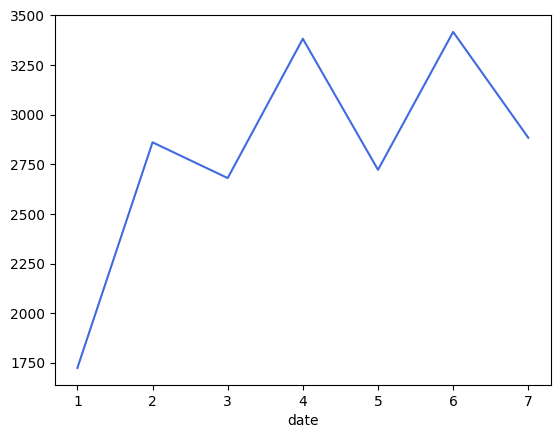

In [97]:
short_kathimerini1['full_text'].str.len().groupby(by=short_kathimerini1.index.day).mean().plot(color='royalblue')

# Με resample()

<Axes: xlabel='date'>

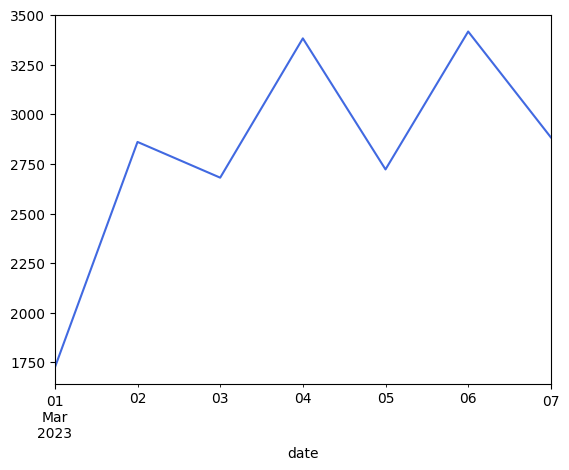

In [98]:
short_kathimerini1['full_text'].str.len().resample('D').mean().plot(color='royalblue')

<Axes: ylabel='date'>

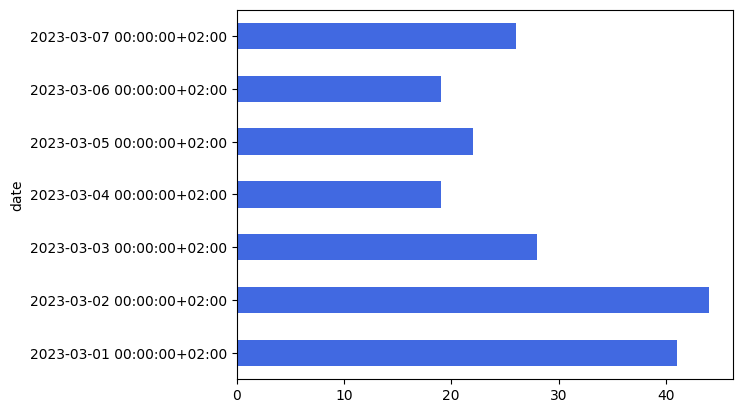

In [99]:
short_kathimerini1['full_text'].resample('D').count().plot(kind='barh', color='royalblue')

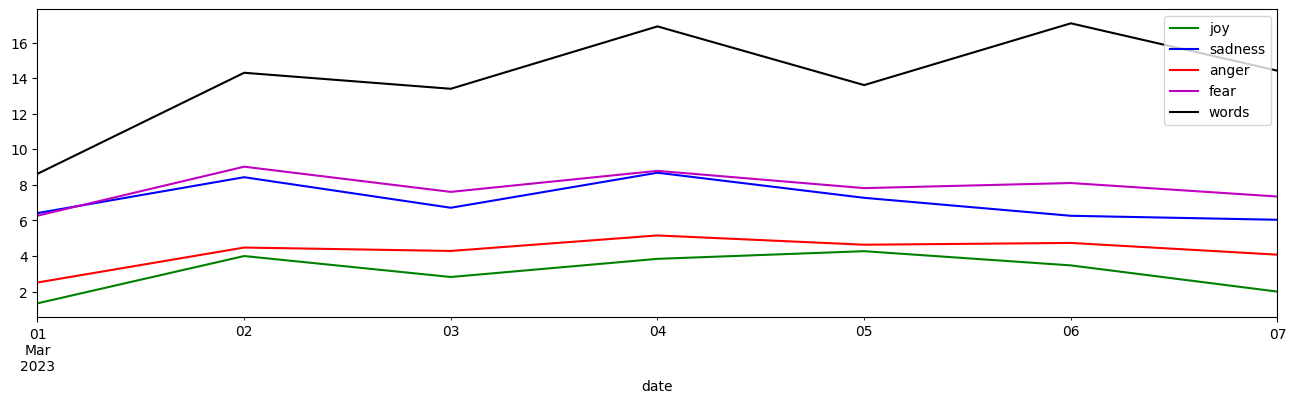

In [100]:
ax = short_kathimerini1['joy'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='joy')
short_kathimerini1['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'sadness', color = 'blue')
short_kathimerini1['anger'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anger',color = 'r').legend()
short_kathimerini1['fear'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'fear',color = 'm').legend()
(short_kathimerini1['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

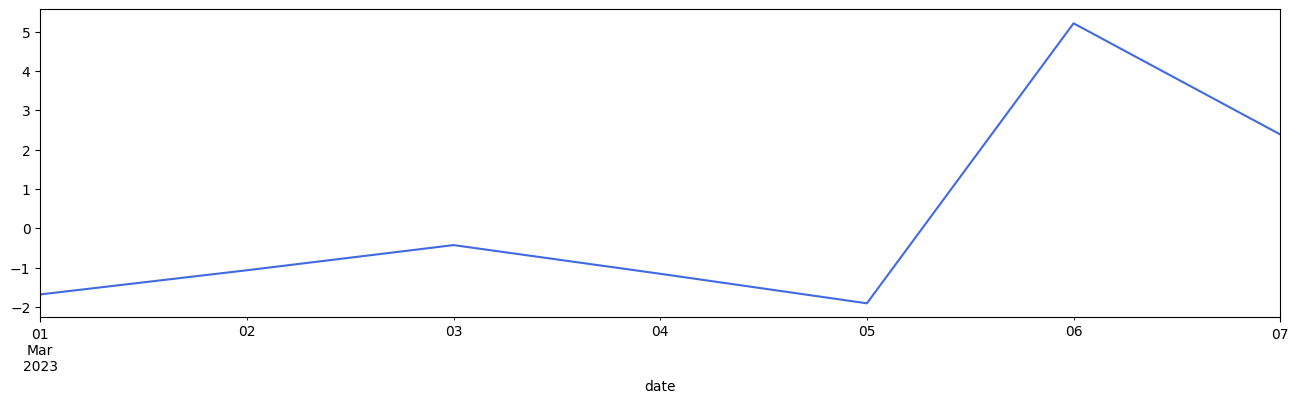

In [101]:
short_kathimerini1['pos/neg'] = short_kathimerini1['positive'] - short_kathimerini1['negative']
short_kathimerini1['pos/neg'].resample('D').mean().plot(figsize=(16,4), color='royalblue')

<Axes: xlabel='date'>

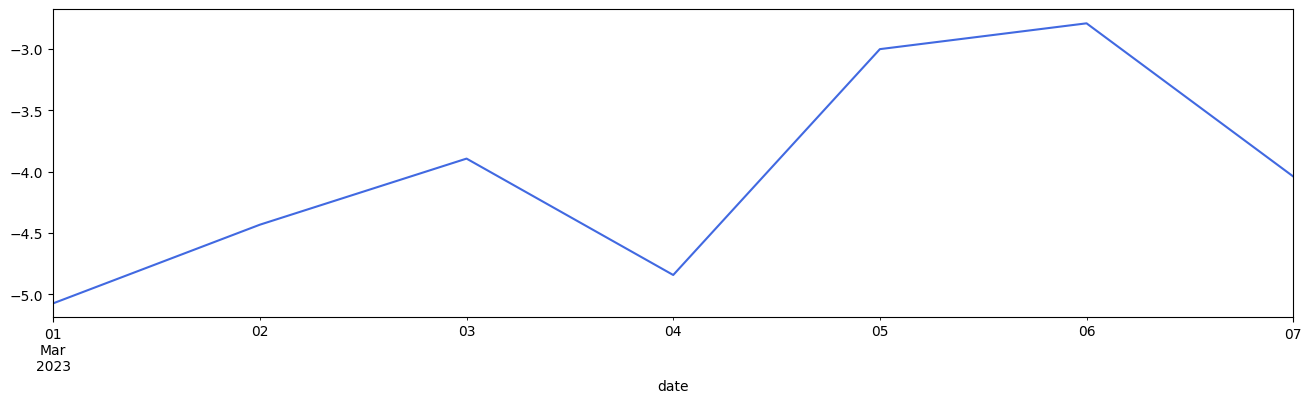

In [102]:
short_kathimerini1['joy/sad'] = short_kathimerini1['joy'] - short_kathimerini1['sadness']
short_kathimerini1['joy/sad'].resample('D').mean().plot(figsize=(16,4), color='royalblue')

<Axes: xlabel='date'>

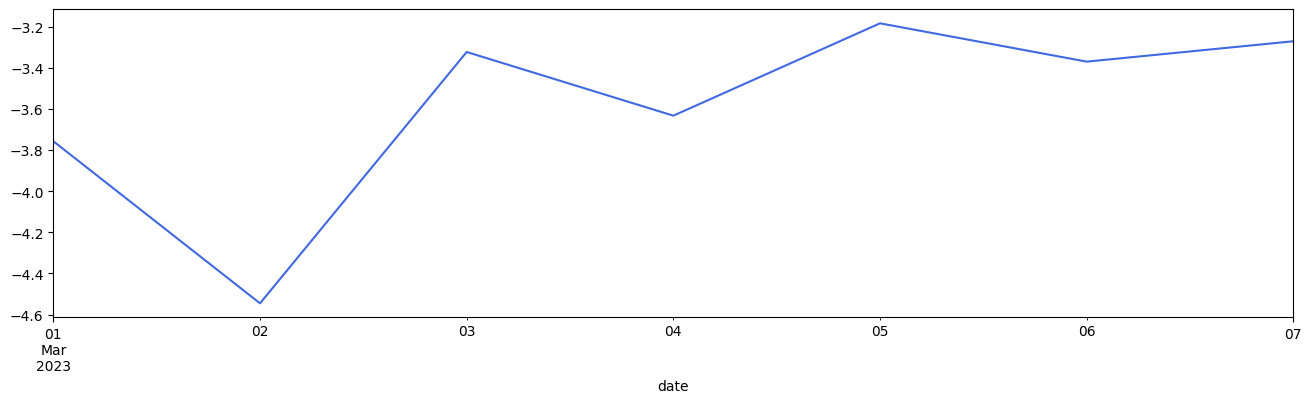

In [103]:
short_kathimerini1['ang/fear'] = short_kathimerini1['anger'] - short_kathimerini1['fear']
short_kathimerini1['ang/fear'].resample('D').mean().plot(figsize=(16,4), color='royalblue')

In [104]:
short_kathimerini1.keys()

Index(['index', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'total_words', 'anger_per',
       'positive_per', 'joy_per', 'disgust_per', 'surprise_per', 'trust_per',
       'anticipation_per', 'sadness_per', 'negative_per', 'fear_per',
       'pos/neg', 'joy/sad', 'ang/fear'],
      dtype='object')

In [105]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

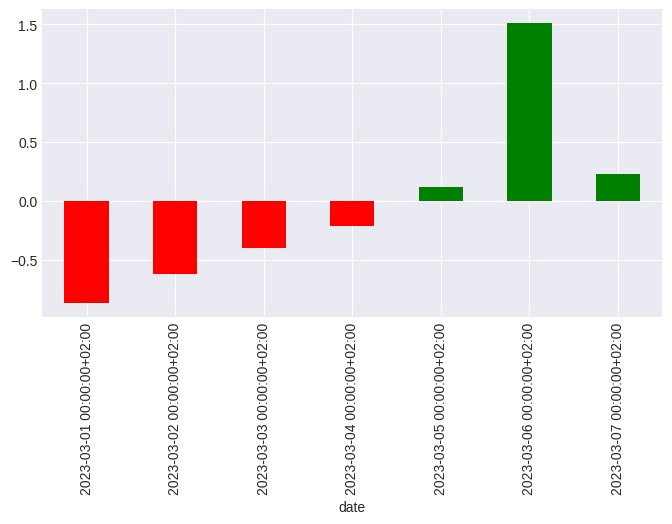

In [106]:
short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'] = short_kathimerini1.positive_per - short_kathimerini1.negative_per

short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

<Axes: xlabel='date'>

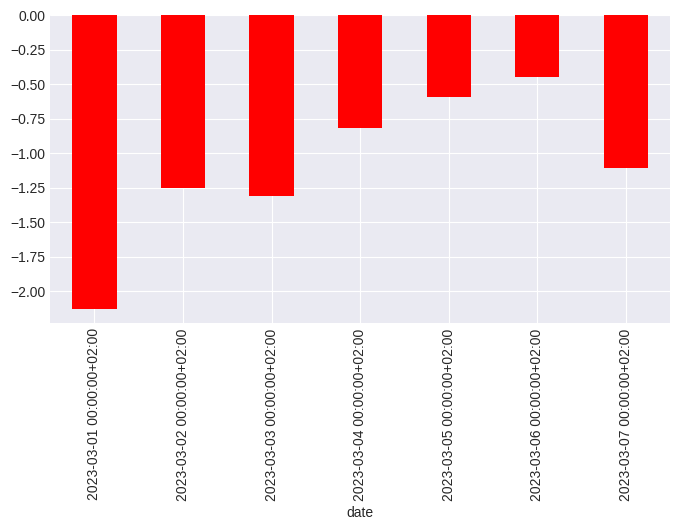

In [107]:
short_kathimerini1['(-)λύπη | χαρά(+)'] = short_kathimerini1.joy_per - short_kathimerini1.sadness_per

short_kathimerini1['(-)λύπη | χαρά(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_kathimerini1['(-)λύπη | χαρά(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

<Axes: xlabel='date'>

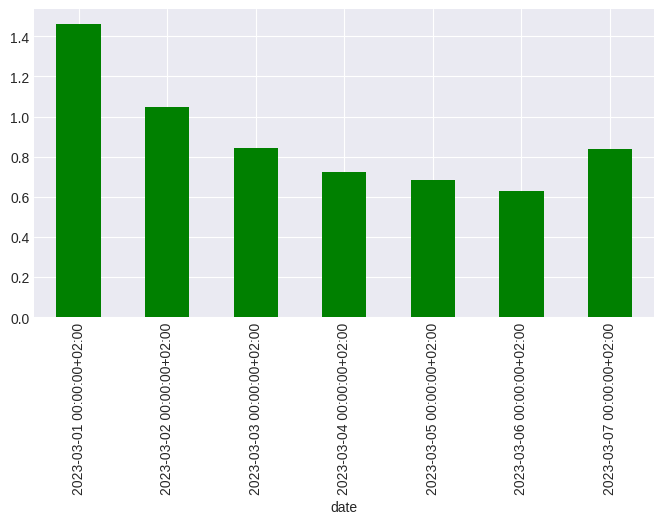

In [108]:
short_kathimerini1['(-)θυμός | φόβος(+)'] = short_kathimerini1.fear_per - short_kathimerini1.anger_per

short_kathimerini1['(-)θυμός | φόβος(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_kathimerini1['(-)θυμός | φόβος(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [109]:
short_kathimerini1[(short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'] == short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'] == short_kathimerini1['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive_per', 'negative_per', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive_per  negative_per  \
date                                                           
2023-03-06 11:44:08+02:00     37      7.614213      2.538071   
2023-03-02 19:14:58+02:00    119      1.190476      7.142857   

                           (-)αρνητικότητα | θετικότητα(+)  
date                                                        
2023-03-06 11:44:08+02:00                         5.076142  
2023-03-02 19:14:58+02:00                        -5.952381

In [110]:
kathimerini_df1.loc[[37,119], ['url','title', 'full_text','date']]

url  \
37   https://www.kathimerini.gr/society/562308358/t...   
119  https://www.kathimerini.gr/society/562303036/t...   

                                                 title  \
37   Τραγωδία στα Τέμπη: Στον ανακριτή και ο σταθμά...   
119  Τραγωδία στα Τέμπη: Κλειστό το Σύνταγμα – Σε ε...   

                                             full_text  \
37   Την πόρτα του ανακριτή αναμένεται να περάσει σ...   
119  Εκατοντάδες πολίτες συγκεντρώθηκαν στην πλατεί...   

                         date  
37  2023-03-06 11:44:08+02:00  
119 2023-03-02 19:14:58+02:00

In [111]:

short_kathimerini1[(short_kathimerini1['(-)λύπη | χαρά(+)'] == short_kathimerini1['(-)λύπη | χαρά(+)'].max()) |
                  (short_kathimerini1['(-)λύπη | χαρά(+)'] == short_kathimerini1['(-)λύπη | χαρά(+)'].min())
                  ][['index', 'joy_per', 'sadness_per', '(-)λύπη | χαρά(+)']]


index   joy_per  sadness_per  (-)λύπη | χαρά(+)
date                                                                      
2023-03-01 20:15:00+02:00    163  0.000000     9.302326          -9.302326
2023-03-01 17:42:32+02:00    171  4.017857     0.892857           3.125000

In [112]:
kathimerini_df1.loc[[163,171], ['url','title', 'full_text','date']]

url  \
163  https://www.kathimerini.gr/society/562301209/t...   
171  https://www.kathimerini.gr/society/562301011/t...   

                                                 title  \
163  Τραγωδία στα Τέμπη: Ο σταθμάρχης παραδέχθηκε π...   
171  Τραγωδία στα Τέμπη: Συγκλονίζουν οι μαρτυρίες ...   

                                             full_text  \
163  Σε πλήρη ομολογία για το μοιραίο λάθος προχώρη...   
171  Δραματικές στιγμές εκτυλίχτηκαν έξω από το ΓΝ ...   

                         date  
163 2023-03-01 20:15:00+02:00  
171 2023-03-01 17:42:32+02:00

In [113]:
short_kathimerini1.columns

Index(['index', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'total_words', 'anger_per',
       'positive_per', 'joy_per', 'disgust_per', 'surprise_per', 'trust_per',
       'anticipation_per', 'sadness_per', 'negative_per', 'fear_per',
       'pos/neg', 'joy/sad', 'ang/fear', '(-)αρνητικότητα | θετικότητα(+)',
       '(-)λύπη | χαρά(+)', '(-)θυμός | φόβος(+)'],
      dtype='object')

In [114]:

short_kathimerini1[(short_kathimerini1['(-)θυμός | φόβος(+)'] == short_kathimerini1['(-)θυμός | φόβος(+)'].max()) |
                  (short_kathimerini1['(-)θυμός | φόβος(+)'] == short_kathimerini1['(-)θυμός | φόβος(+)'].min())
                  ][['index', 'fear_per', 'anger_per', '(-)θυμός | φόβος(+)']]

index  fear_per  anger_per  (-)θυμός | φόβος(+)
date                                                                      
2023-03-03 15:13:51+02:00     97  4.109589    0.00000             4.109589
2023-03-03 12:41:09+02:00    101  0.836820    2.09205            -1.255230

In [115]:
kathimerini_df1.loc[[97,101], ['url','title', 'full_text','date']]

url  \
97   https://www.kathimerini.gr/world/562304755/alv...   
101  https://www.kathimerini.gr/society/562304548/t...   

                                                 title  \
97   Αλβανία: Μέρα εθνικού πένθους για το δυστύχημα...   
101  Τραγωδία στα Τέμπη: Πορεία μαθητών και φοιτητώ...   

                                             full_text  \
97   Μέρα εθνικού πένθους για το σιδηροδρομικό δυστ...   
101  Πορεία πραγματοποιούν αυτή την ώρα στο κέντρο ...   

                         date  
97  2023-03-03 15:13:51+02:00  
101 2023-03-03 12:41:09+02:00